# Homotopy Theory Basics

## Introduction

**Homotopy theory** is a fundamental branch of algebraic topology that studies topological spaces up to continuous deformation. Two continuous maps are said to be **homotopic** if one can be continuously deformed into the other. This notion captures the intuition that two paths or shapes are "essentially the same" if they can be smoothly transformed into one another.

## Mathematical Foundations

### Definition of Homotopy

Let $X$ and $Y$ be topological spaces, and let $f, g: X \to Y$ be continuous maps. A **homotopy** between $f$ and $g$ is a continuous map:

$$H: X \times [0,1] \to Y$$

such that:
- $H(x, 0) = f(x)$ for all $x \in X$
- $H(x, 1) = g(x)$ for all $x \in X$

When such an $H$ exists, we write $f \simeq g$ and say that $f$ is **homotopic** to $g$.

### Path Homotopy

A particularly important case is when $X = [0,1]$. A **path** in $Y$ is a continuous map $\gamma: [0,1] \to Y$. Two paths $\gamma_0$ and $\gamma_1$ with the same endpoints are **path-homotopic** if there exists a continuous map:

$$H: [0,1] \times [0,1] \to Y$$

satisfying:
- $H(s, 0) = \gamma_0(s)$ and $H(s, 1) = \gamma_1(s)$ for all $s \in [0,1]$
- $H(0, t) = \gamma_0(0) = \gamma_1(0)$ (fixed starting point)
- $H(1, t) = \gamma_0(1) = \gamma_1(1)$ (fixed ending point)

### Homotopy Equivalence

Two spaces $X$ and $Y$ are **homotopy equivalent** (denoted $X \simeq Y$) if there exist continuous maps $f: X \to Y$ and $g: Y \to X$ such that:

$$g \circ f \simeq \text{id}_X \quad \text{and} \quad f \circ g \simeq \text{id}_Y$$

Homotopy equivalent spaces share many topological invariants, including all homotopy groups.

### The Fundamental Group

The **fundamental group** $\pi_1(X, x_0)$ consists of equivalence classes of loops based at $x_0$ under path homotopy, with concatenation as the group operation:

$$\pi_1(X, x_0) = \{[\gamma] : \gamma(0) = \gamma(1) = x_0\}$$

For a loop $\gamma$ and $\eta$, their product is:

$$(\gamma \cdot \eta)(s) = \begin{cases} \gamma(2s) & 0 \leq s \leq \frac{1}{2} \\ \eta(2s-1) & \frac{1}{2} \leq s \leq 1 \end{cases}$$

### Higher Homotopy Groups

The $n$-th homotopy group $\pi_n(X, x_0)$ generalizes loops to $n$-dimensional spheres:

$$\pi_n(X, x_0) = [(S^n, s_0), (X, x_0)]$$

where $[(S^n, s_0), (X, x_0)]$ denotes homotopy classes of basepoint-preserving maps from $S^n$ to $X$. For $n \geq 2$, these groups are abelian.

## Key Examples

| Space | $\pi_1$ | $\pi_2$ | Notes |
|-------|---------|---------|-------|
| $\mathbb{R}^n$ | $0$ | $0$ | Contractible |
| $S^1$ | $\mathbb{Z}$ | $0$ | Circle |
| $S^2$ | $0$ | $\mathbb{Z}$ | 2-sphere |
| $T^2$ | $\mathbb{Z}^2$ | $0$ | Torus |

## Computational Demonstration

We will visualize the concept of path homotopy by showing how one path can be continuously deformed into another while keeping the endpoints fixed. We'll also illustrate loops on different topological spaces to build intuition for the fundamental group.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up high-quality figure aesthetics
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13

### Path Homotopy Visualization

Consider two paths $\gamma_0$ and $\gamma_1$ in $\mathbb{R}^2$ connecting points $A = (0,0)$ and $B = (1,0)$:

$$\gamma_0(s) = (s, 0) \quad \text{(straight line)}$$
$$\gamma_1(s) = (s, \sin(\pi s)) \quad \text{(arc)}$$

A homotopy between them is:
$$H(s,t) = (s, t \cdot \sin(\pi s))$$

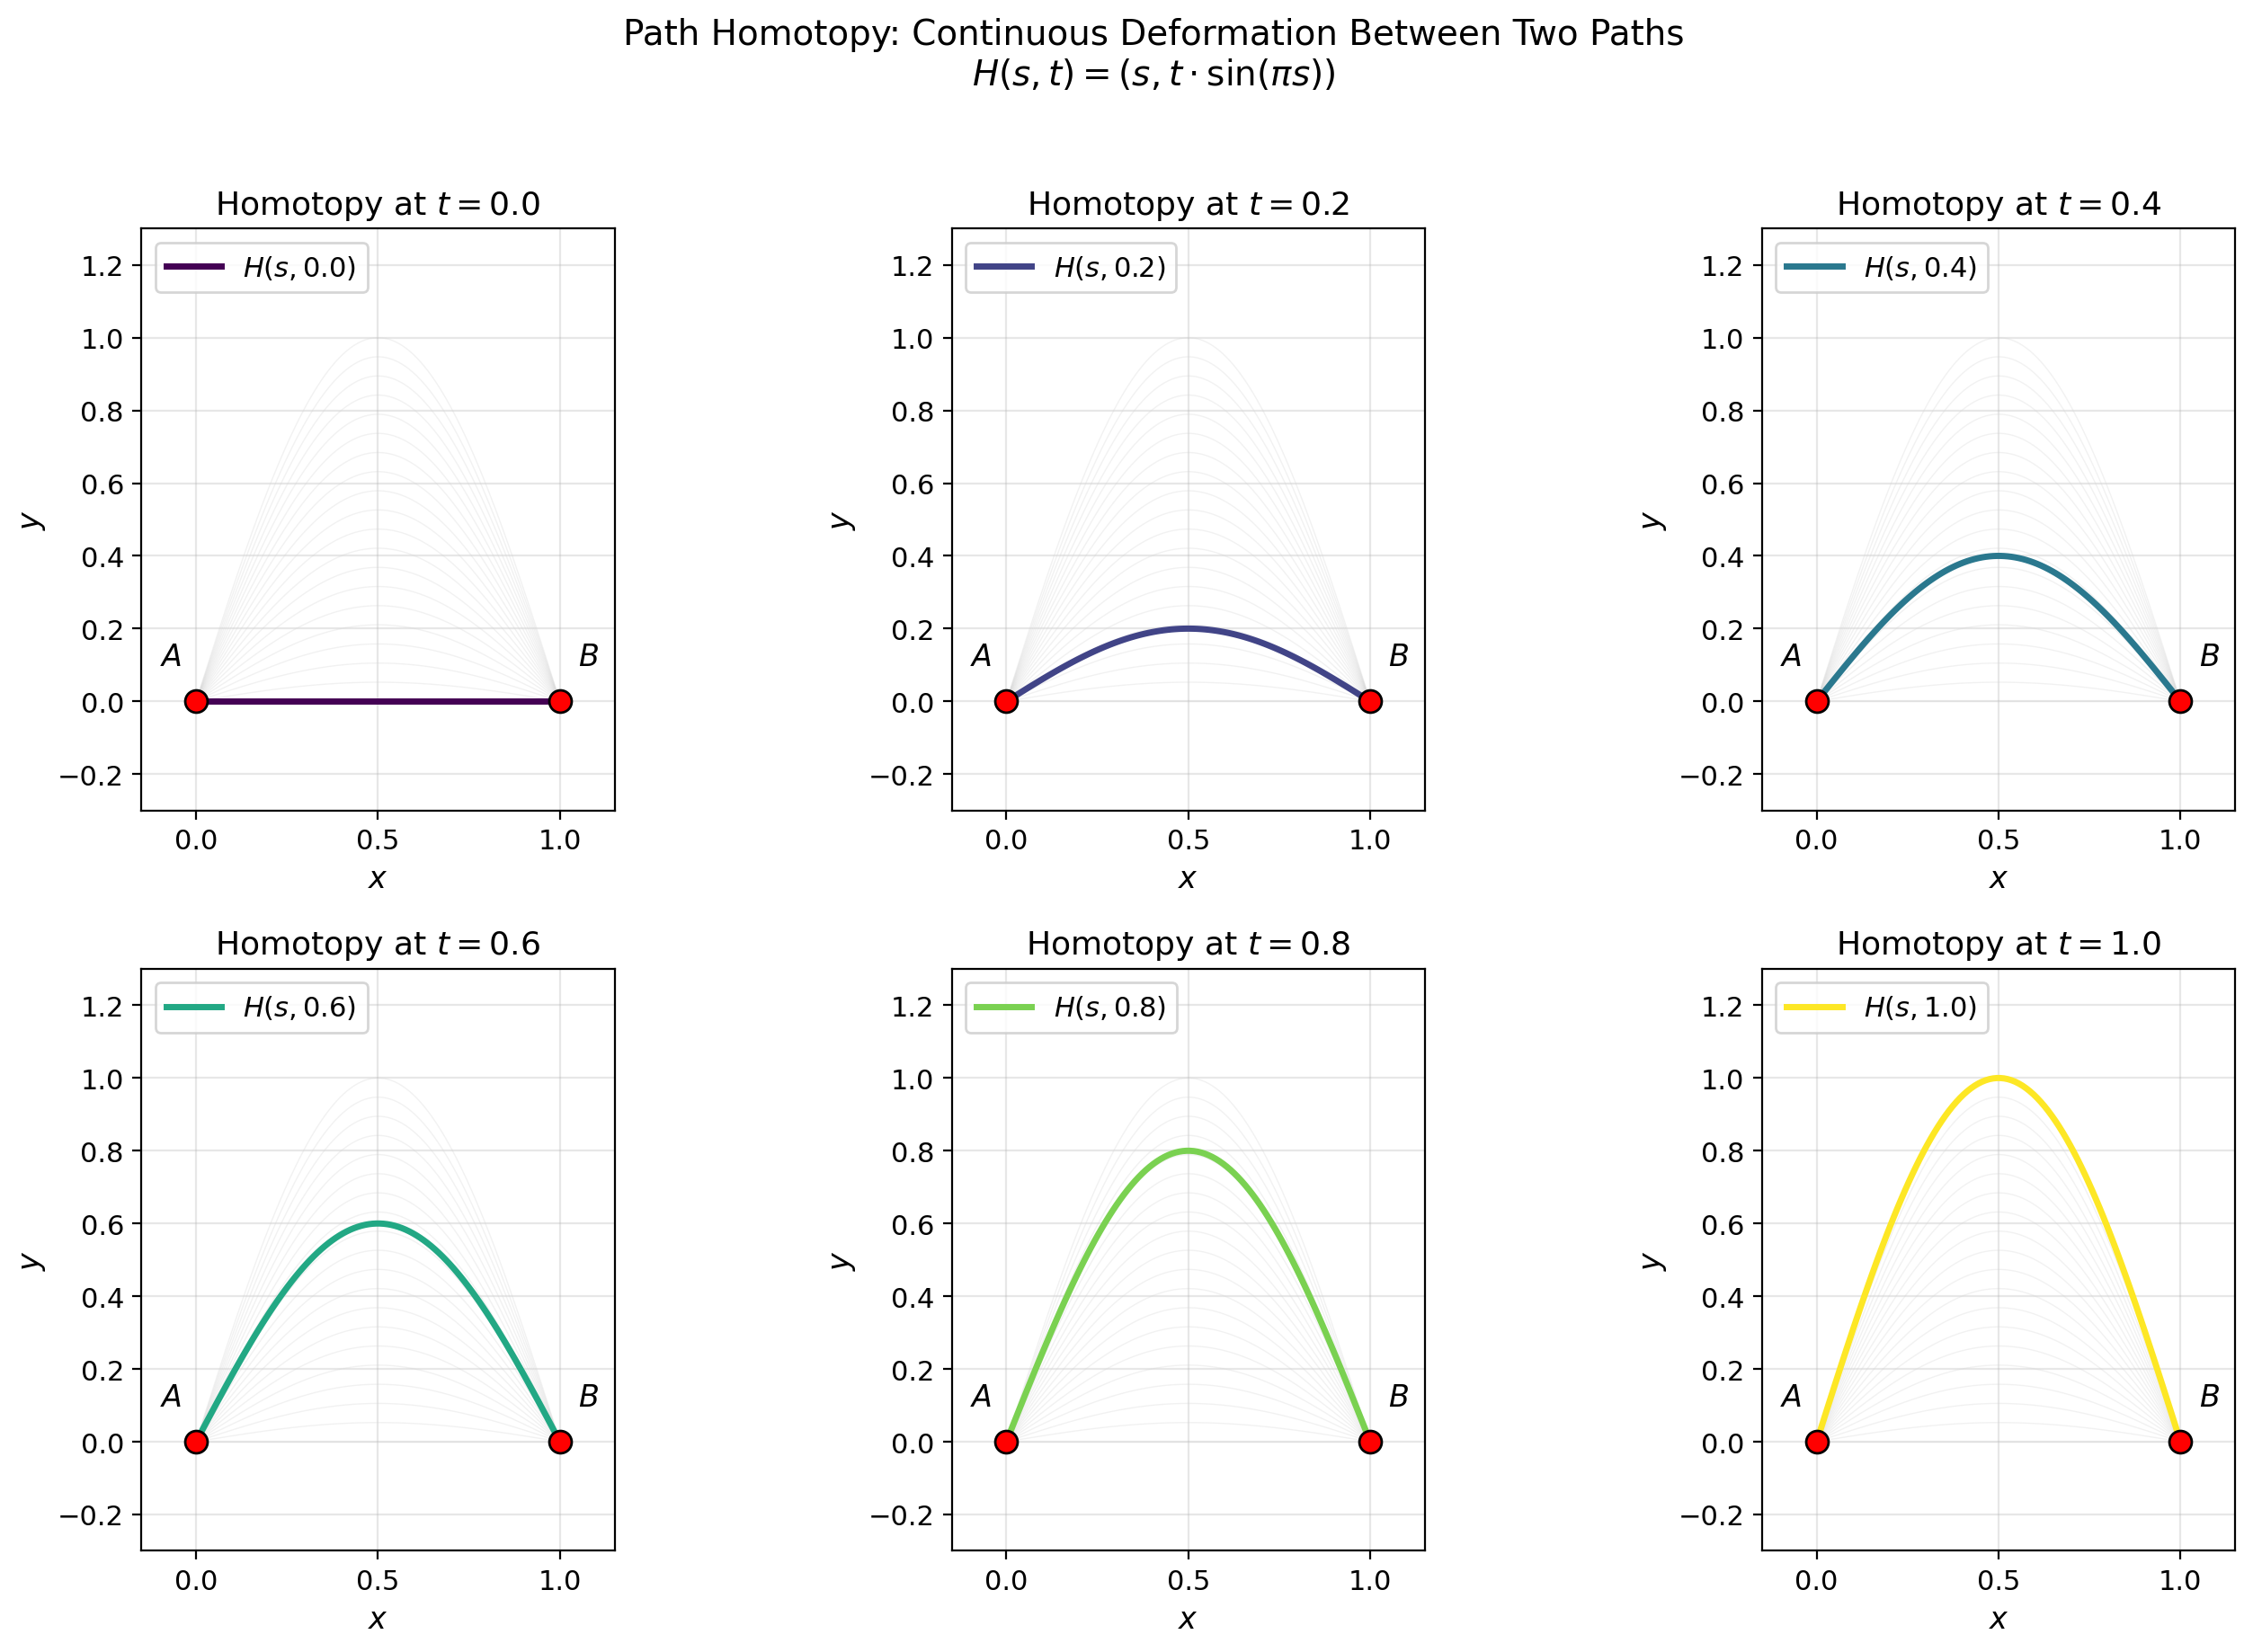

Path homotopy visualization saved to plot.png


In [2]:
def path_homotopy(s, t):
    """
    Homotopy H(s,t) between a straight line and a sine arc.
    
    Parameters:
    s : float or array - path parameter in [0,1]
    t : float - homotopy parameter in [0,1]
    
    Returns:
    tuple of (x, y) coordinates
    """
    x = s
    y = t * np.sin(np.pi * s)
    return x, y

# Create figure for path homotopy
fig, axes = plt.subplots(2, 3, figsize=(14, 9))

# Path parameter
s_values = np.linspace(0, 1, 100)

# Plot paths at different homotopy stages
t_stages = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(t_stages)))

for idx, (ax, t) in enumerate(zip(axes.flatten(), t_stages)):
    # Draw all intermediate paths with transparency
    for t_intermediate in np.linspace(0, 1, 20):
        x, y = path_homotopy(s_values, t_intermediate)
        ax.plot(x, y, color='lightgray', alpha=0.3, linewidth=0.5)
    
    # Draw current path prominently
    x, y = path_homotopy(s_values, t)
    ax.plot(x, y, color=colors[idx], linewidth=2.5, label=f'$H(s, {t})$')
    
    # Mark endpoints
    ax.scatter([0, 1], [0, 0], color='red', s=80, zorder=5, edgecolors='black')
    ax.annotate('$A$', (0, 0), xytext=(-0.1, 0.1), fontsize=12)
    ax.annotate('$B$', (1, 0), xytext=(1.05, 0.1), fontsize=12)
    
    ax.set_xlim(-0.15, 1.15)
    ax.set_ylim(-0.3, 1.3)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title(f'Homotopy at $t = {t}$')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')

plt.suptitle('Path Homotopy: Continuous Deformation Between Two Paths\n$H(s,t) = (s, t \\cdot \\sin(\\pi s))$', 
             fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('homotopy_theory_basics_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("Path homotopy visualization saved to plot.png")

### Loops and the Fundamental Group

Now let's visualize loops on different spaces to understand why their fundamental groups differ. We'll examine:

1. **The plane $\mathbb{R}^2$**: Any loop can be contracted to a point, so $\pi_1(\mathbb{R}^2) = 0$
2. **The punctured plane $\mathbb{R}^2 \setminus \{0\}$**: Loops around the puncture cannot be contracted, giving $\pi_1 = \mathbb{Z}$

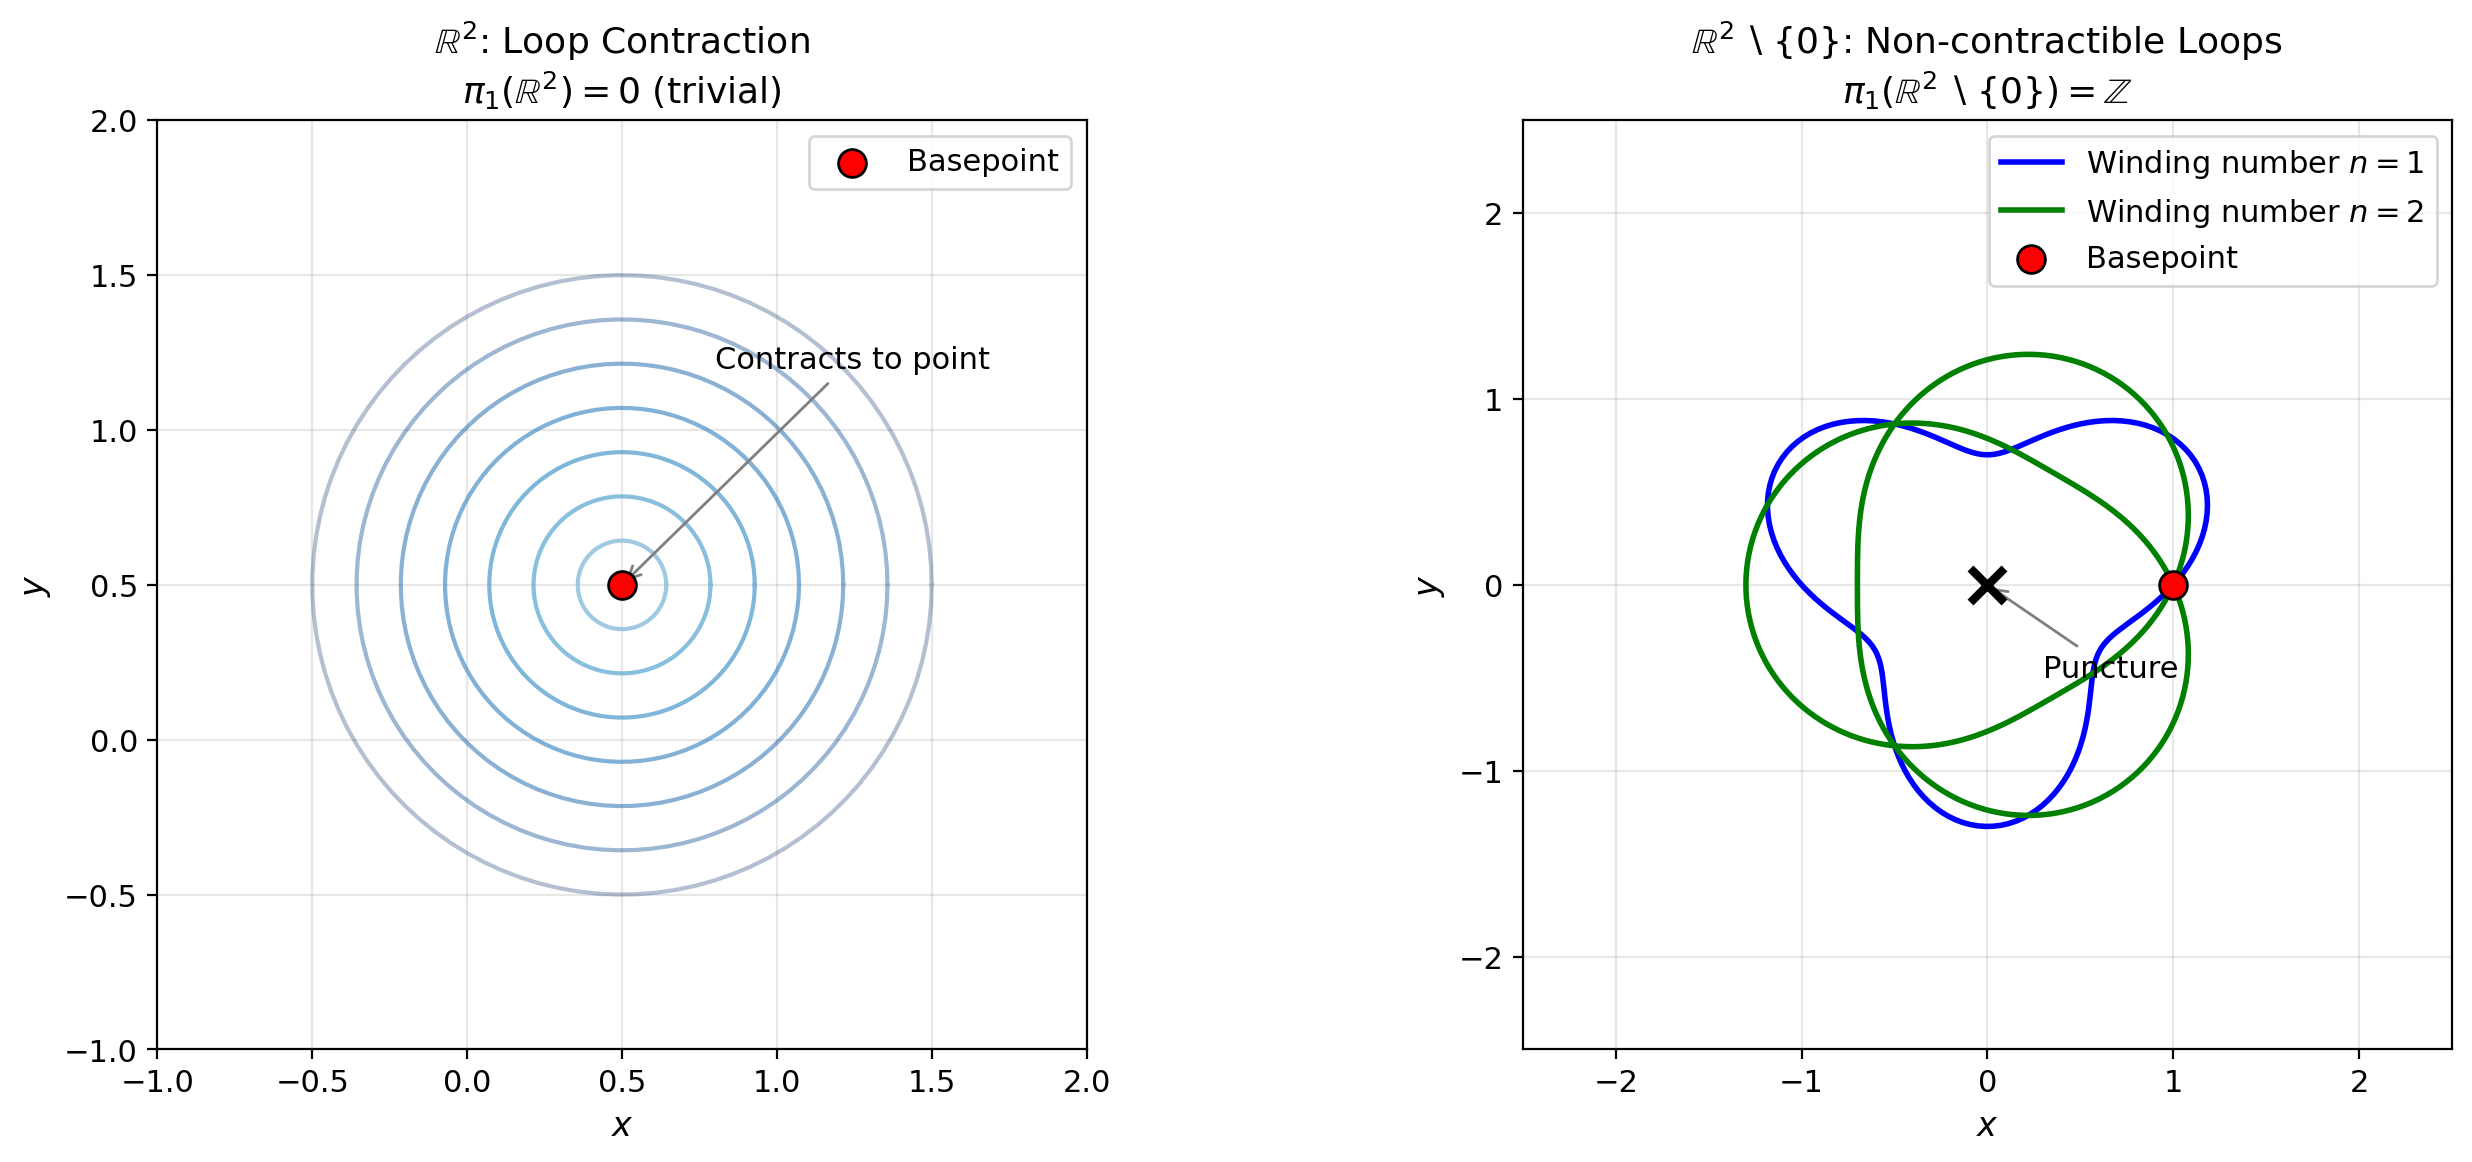

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Contractible loop in R^2
ax1 = axes[0]
theta = np.linspace(0, 2*np.pi, 100)

# Show loop contraction
for r in np.linspace(1, 0, 8):
    x = r * np.cos(theta) + 0.5
    y = r * np.sin(theta) + 0.5
    alpha = 0.3 + 0.7 * (1 - r)
    ax1.plot(x, y, color=plt.cm.Blues(0.3 + 0.7*r), alpha=alpha, linewidth=1.5)

# Mark basepoint
ax1.scatter([0.5], [0.5], color='red', s=100, zorder=5, edgecolors='black', label='Basepoint')
ax1.annotate('Contracts to point', (0.5, 0.5), xytext=(0.8, 1.2), 
             arrowprops=dict(arrowstyle='->', color='gray'), fontsize=11)

ax1.set_xlim(-1, 2)
ax1.set_ylim(-1, 2)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('$\\mathbb{R}^2$: Loop Contraction\n$\\pi_1(\\mathbb{R}^2) = 0$ (trivial)')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Right: Non-contractible loop in punctured plane
ax2 = axes[1]

# Draw several loops with different winding numbers
for n, color in zip([1, 2], ['blue', 'green']):
    t = np.linspace(0, 2*np.pi*n, 200*n)
    r = 1 + 0.3 * np.sin(3*t/n)
    x = r * np.cos(t)
    y = r * np.sin(t)
    ax2.plot(x, y, color=color, linewidth=2, label=f'Winding number $n={n}$')

# Mark the puncture
ax2.scatter([0], [0], color='black', s=150, marker='x', linewidths=3, zorder=5)
ax2.annotate('Puncture', (0, 0), xytext=(0.3, -0.5), fontsize=11,
             arrowprops=dict(arrowstyle='->', color='gray'))

# Basepoint
ax2.scatter([1], [0], color='red', s=100, zorder=5, edgecolors='black', label='Basepoint')

ax2.set_xlim(-2.5, 2.5)
ax2.set_ylim(-2.5, 2.5)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_title('$\\mathbb{R}^2 \\setminus \\{0\\}$: Non-contractible Loops\n$\\pi_1(\\mathbb{R}^2 \\setminus \\{0\\}) = \\mathbb{Z}$')
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Visualizing Loops on a Torus

The torus $T^2$ has fundamental group $\pi_1(T^2) \cong \mathbb{Z} \times \mathbb{Z}$, generated by two independent loops:
- A **meridian** (going around the "tube")
- A **longitude** (going around the "hole")

The torus can be parameterized as:
$$x = (R + r\cos\phi)\cos\theta$$
$$y = (R + r\cos\phi)\sin\theta$$  
$$z = r\sin\phi$$

where $R$ is the major radius, $r$ is the minor radius, $\theta \in [0, 2\pi)$ and $\phi \in [0, 2\pi)$.

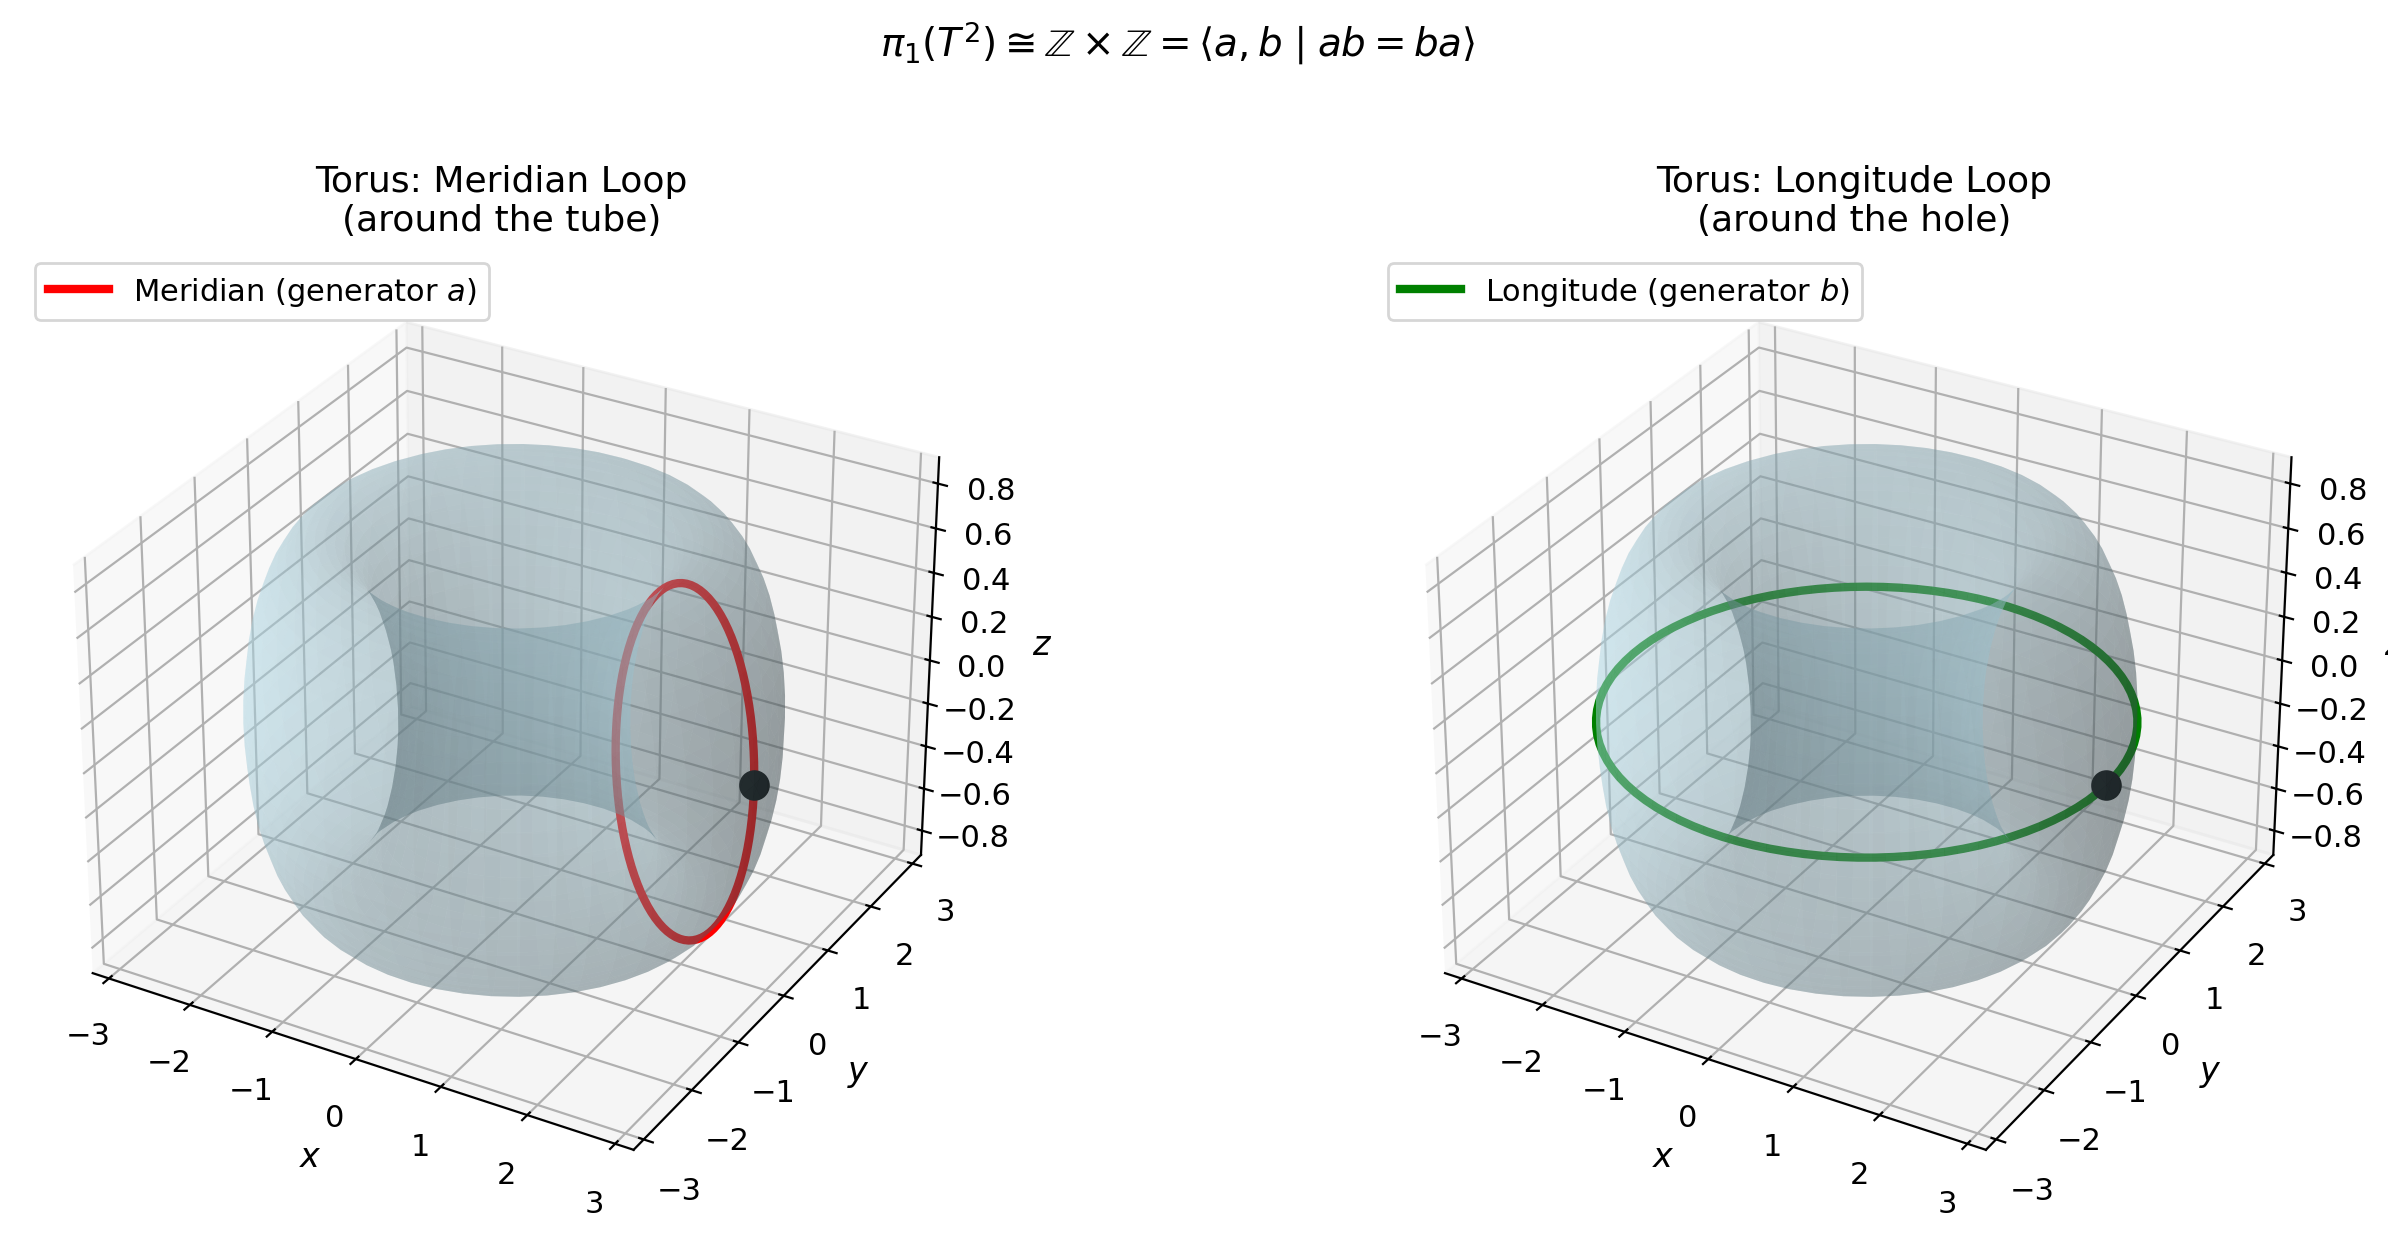

In [4]:
fig = plt.figure(figsize=(14, 6))

# Torus parameters
R = 2  # major radius
r = 0.8  # minor radius

# Create torus surface
theta_surf = np.linspace(0, 2*np.pi, 50)
phi_surf = np.linspace(0, 2*np.pi, 50)
theta_surf, phi_surf = np.meshgrid(theta_surf, phi_surf)

X_torus = (R + r*np.cos(phi_surf)) * np.cos(theta_surf)
Y_torus = (R + r*np.cos(phi_surf)) * np.sin(theta_surf)
Z_torus = r * np.sin(phi_surf)

# First subplot: Meridian loop
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X_torus, Y_torus, Z_torus, alpha=0.3, color='lightblue', edgecolor='none')

# Meridian (fixed theta, varying phi)
theta_fixed = 0
phi_loop = np.linspace(0, 2*np.pi, 100)
x_meridian = (R + r*np.cos(phi_loop)) * np.cos(theta_fixed)
y_meridian = (R + r*np.cos(phi_loop)) * np.sin(theta_fixed)
z_meridian = r * np.sin(phi_loop)
ax1.plot(x_meridian, y_meridian, z_meridian, 'r-', linewidth=3, label='Meridian (generator $a$)')

# Mark basepoint
ax1.scatter([R+r], [0], [0], color='black', s=100, zorder=5)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')
ax1.set_title('Torus: Meridian Loop\n(around the tube)')
ax1.legend(loc='upper left')

# Second subplot: Longitude loop
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_torus, Y_torus, Z_torus, alpha=0.3, color='lightblue', edgecolor='none')

# Longitude (fixed phi, varying theta)
phi_fixed = 0
theta_loop = np.linspace(0, 2*np.pi, 100)
x_longitude = (R + r*np.cos(phi_fixed)) * np.cos(theta_loop)
y_longitude = (R + r*np.cos(phi_fixed)) * np.sin(theta_loop)
z_longitude = r * np.sin(phi_fixed) * np.ones_like(theta_loop)
ax2.plot(x_longitude, y_longitude, z_longitude, 'g-', linewidth=3, label='Longitude (generator $b$)')

# Mark basepoint
ax2.scatter([R+r], [0], [0], color='black', s=100, zorder=5)

ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_zlabel('$z$')
ax2.set_title('Torus: Longitude Loop\n(around the hole)')
ax2.legend(loc='upper left')

plt.suptitle('$\\pi_1(T^2) \\cong \\mathbb{Z} \\times \\mathbb{Z} = \\langle a, b \\mid ab = ba \\rangle$', 
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Homotopy Type of the Circle

Let's verify computationally that the winding number is a homotopy invariant for loops on $S^1$. We parameterize loops as $\gamma(t) = e^{i f(t)}$ where $f: [0,1] \to \mathbb{R}$ with $f(0) = 0$.

The winding number is:
$$n = \frac{f(1)}{2\pi}$$

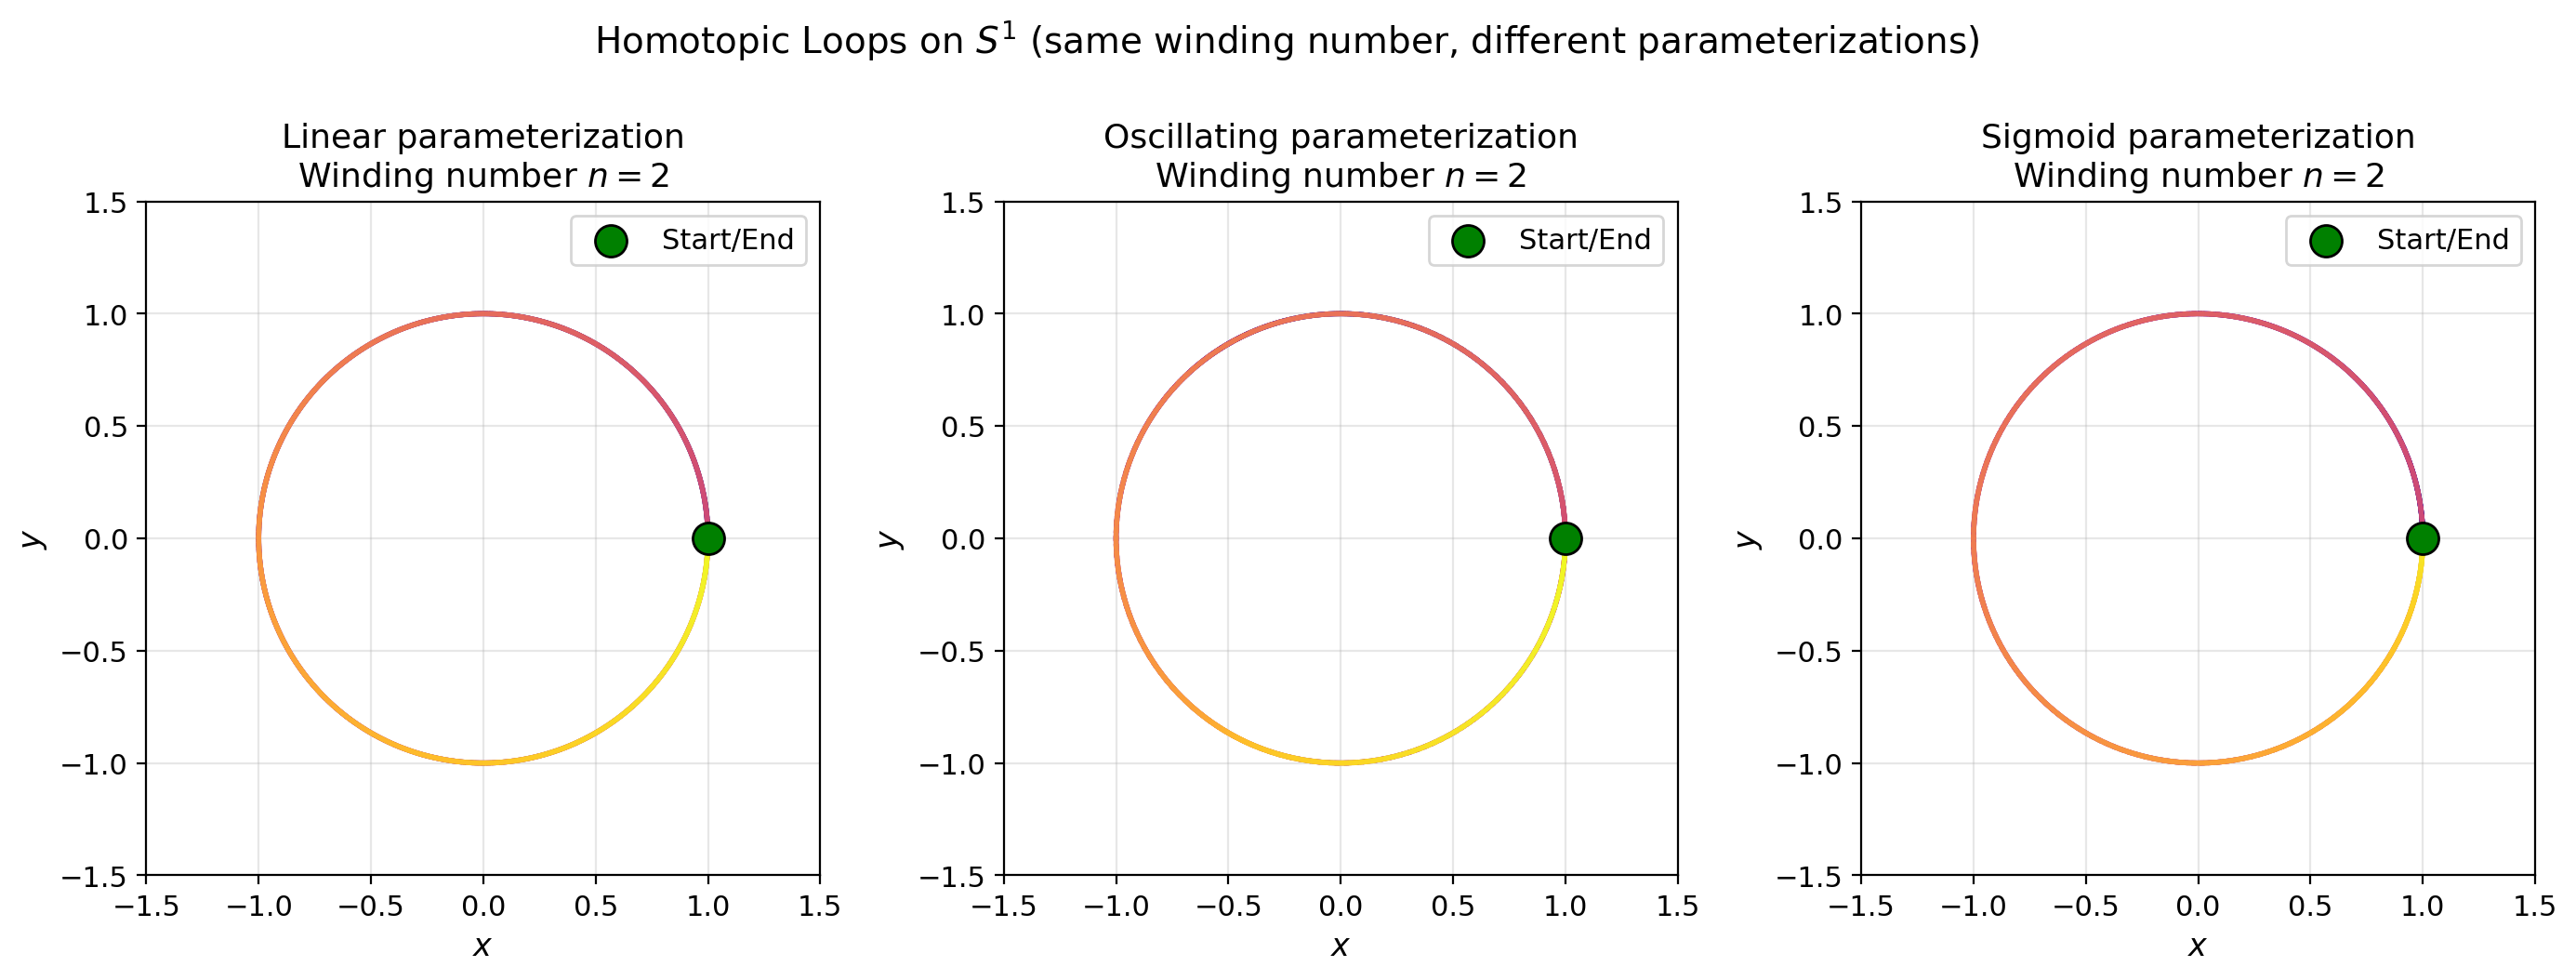

All three loops have winding number 2, confirming they are homotopic.
The winding number is a homotopy invariant: [γ] ↦ n ∈ ℤ


In [5]:
def winding_number(f_values):
    """
    Compute winding number from angle function values.
    
    Parameters:
    f_values : array - values of angle function f(t)
    
    Returns:
    int - winding number
    """
    return int(np.round(f_values[-1] / (2 * np.pi)))

def loop_from_angle(f_values):
    """
    Convert angle function to loop coordinates on S^1.
    """
    return np.cos(f_values), np.sin(f_values)

# Create homotopic loops with different shapes but same winding number
t = np.linspace(0, 1, 500)

# Three homotopic loops with winding number 2
f1 = 4 * np.pi * t  # Linear
f2 = 4 * np.pi * t + 0.5 * np.sin(6 * np.pi * t)  # Wavy
f3 = 4 * np.pi * (3 * t**2 - 2 * t**3)  # Smooth sigmoid-like

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

for ax, f, name in zip(axes, [f1, f2, f3], ['Linear', 'Oscillating', 'Sigmoid']):
    x, y = loop_from_angle(f)
    
    # Draw unit circle
    theta_circle = np.linspace(0, 2*np.pi, 100)
    ax.plot(np.cos(theta_circle), np.sin(theta_circle), 'k--', alpha=0.3, linewidth=1)
    
    # Draw loop with color gradient showing parameter progression
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    for i in range(len(t) - 1):
        color = plt.cm.plasma(t[i])
        ax.plot([x[i], x[i+1]], [y[i], y[i+1]], color=color, linewidth=2)
    
    # Mark start/end point
    ax.scatter([1], [0], color='green', s=150, zorder=5, marker='o', edgecolors='black', label='Start/End')
    
    n = winding_number(f)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title(f'{name} parameterization\nWinding number $n = {n}$')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')

plt.suptitle('Homotopic Loops on $S^1$ (same winding number, different parameterizations)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print(f"All three loops have winding number 2, confirming they are homotopic.")
print(f"The winding number is a homotopy invariant: [γ] ↦ n ∈ ℤ")

### Homotopy Lifting Property

The covering space $\mathbb{R} \to S^1$ given by $p(x) = e^{2\pi i x}$ demonstrates the connection between the fundamental group and covering spaces. A loop $\gamma$ in $S^1$ lifts to a path $\tilde{\gamma}$ in $\mathbb{R}$, and the winding number equals $\tilde{\gamma}(1) - \tilde{\gamma}(0)$.

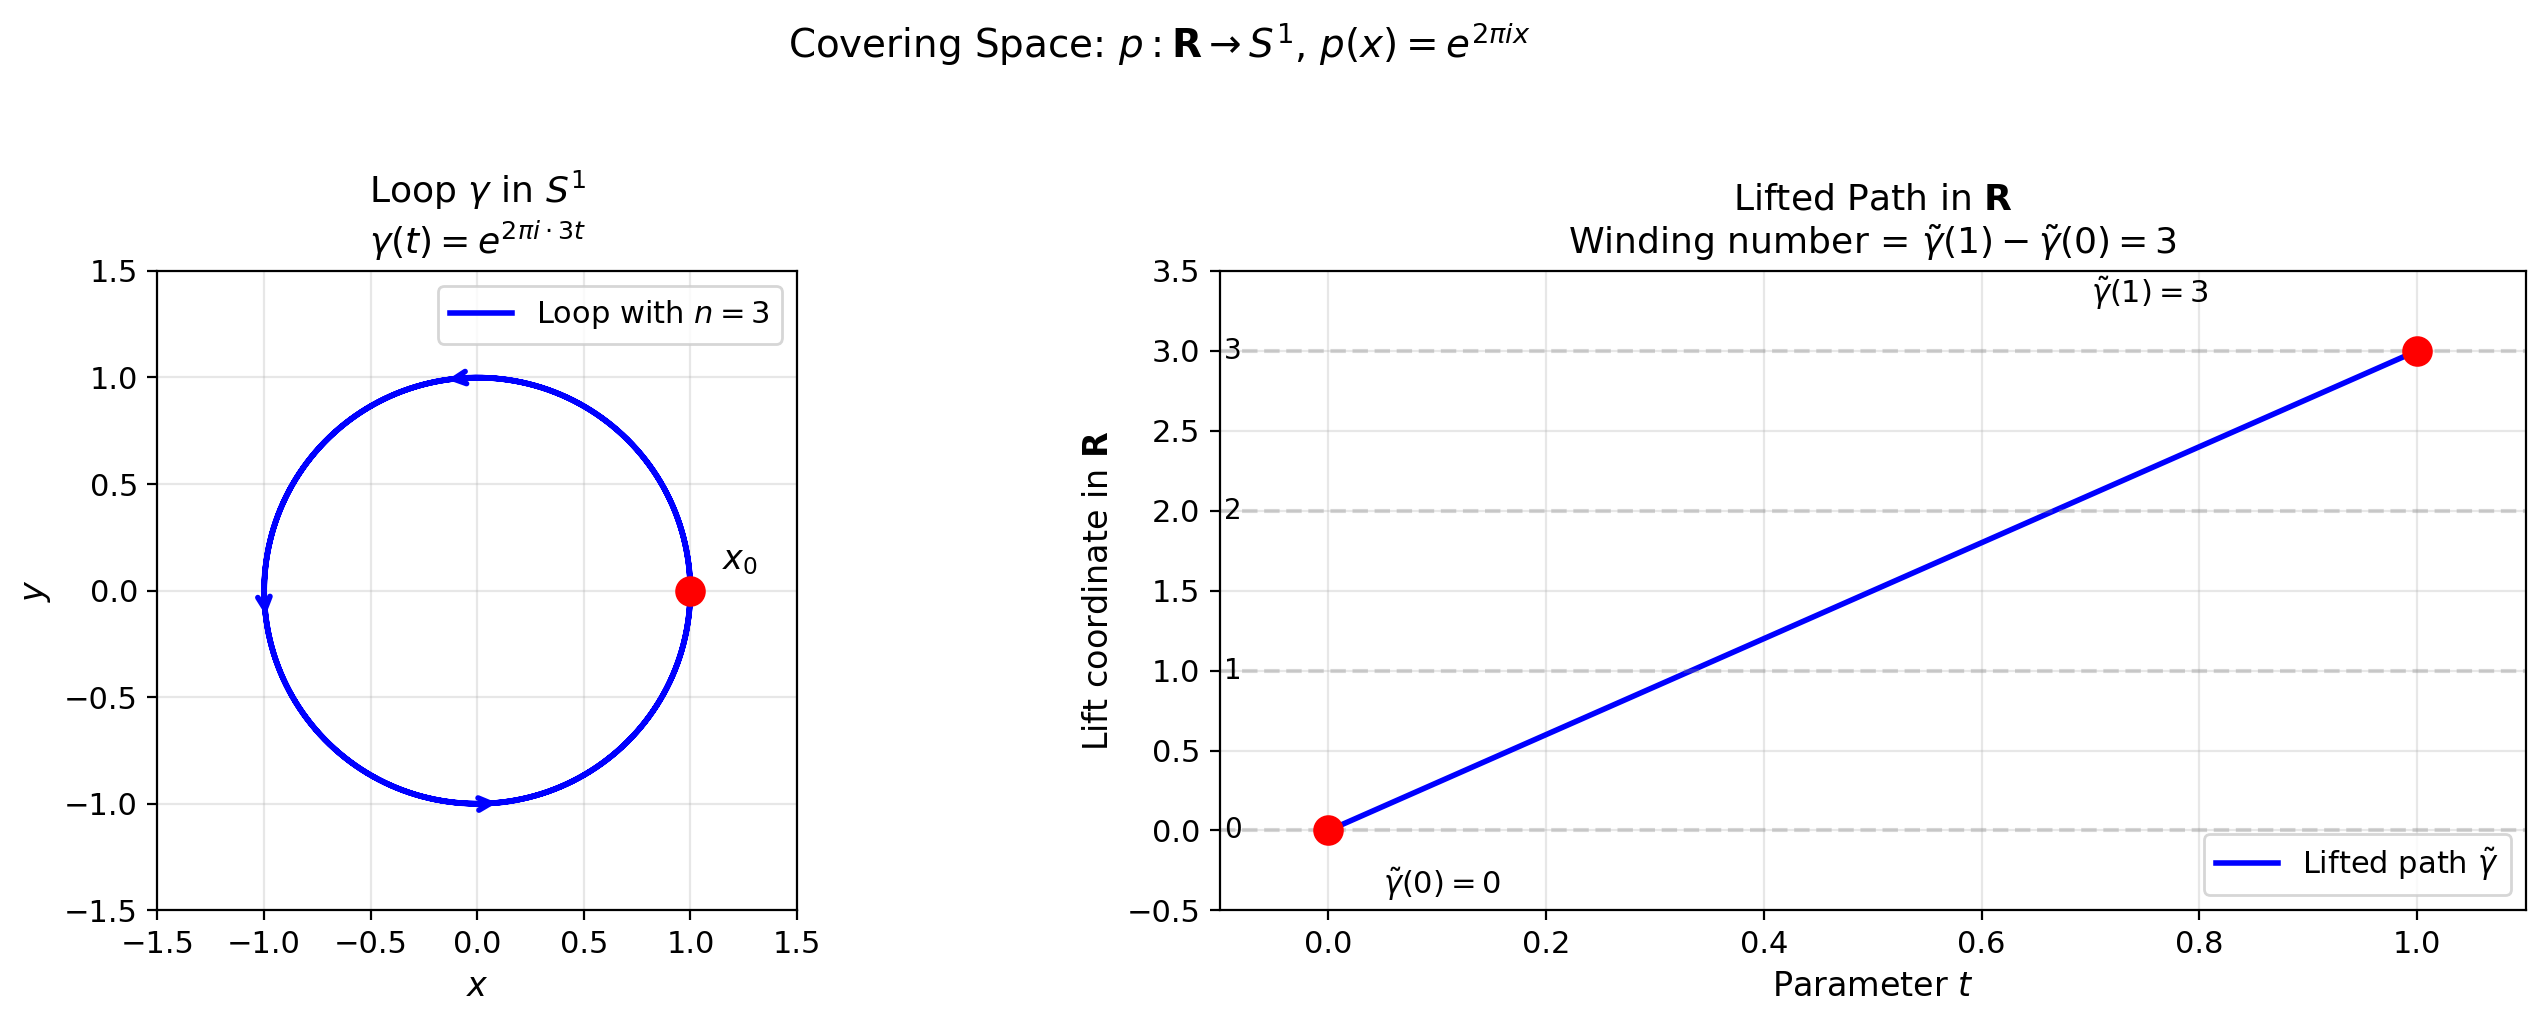

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Loop in S^1
ax1 = axes[0]
t = np.linspace(0, 1, 200)
n_wind = 3  # Winding number
f = 2 * np.pi * n_wind * t
x, y = np.cos(f), np.sin(f)

# Draw unit circle
theta_circle = np.linspace(0, 2*np.pi, 100)
ax1.plot(np.cos(theta_circle), np.sin(theta_circle), 'k-', alpha=0.3, linewidth=1)

# Draw loop with arrows showing direction
ax1.plot(x, y, 'b-', linewidth=2, label=f'Loop with $n={n_wind}$')
# Add direction arrows
for i in [50, 100, 150]:
    ax1.annotate('', xy=(x[i+1], y[i+1]), xytext=(x[i], y[i]),
                arrowprops=dict(arrowstyle='->', color='blue', lw=2))

ax1.scatter([1], [0], color='red', s=100, zorder=5)
ax1.annotate('$x_0$', (1, 0), xytext=(1.15, 0.1), fontsize=12)

ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title(f'Loop $\\gamma$ in $S^1$\n$\\gamma(t) = e^{{2\\pi i \\cdot {n_wind}t}}$')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Right: Lifted path in R
ax2 = axes[1]
lifted_path = n_wind * t  # Lift of the loop

ax2.plot(t, lifted_path, 'b-', linewidth=2, label='Lifted path $\\tilde{\\gamma}$')
ax2.scatter([0, 1], [0, n_wind], color='red', s=100, zorder=5)
ax2.annotate('$\\tilde{\\gamma}(0) = 0$', (0, 0), xytext=(0.05, -0.4), fontsize=11)
ax2.annotate(f'$\\tilde{{\\gamma}}(1) = {n_wind}$', (1, n_wind), xytext=(0.7, n_wind+0.3), fontsize=11)

# Draw horizontal lines at integers to show covering map fibers
for n in range(n_wind + 1):
    ax2.axhline(y=n, color='gray', linestyle='--', alpha=0.3)
    ax2.text(-0.08, n, f'{n}', fontsize=10, ha='right', va='center')

ax2.set_xlim(-0.1, 1.1)
ax2.set_ylim(-0.5, n_wind + 0.5)
ax2.set_xlabel('Parameter $t$')
ax2.set_ylabel('Lift coordinate in $\\mathbf{R}$')
ax2.set_title(f'Lifted Path in $\\mathbf{{R}}$\nWinding number = $\\tilde{{\\gamma}}(1) - \\tilde{{\\gamma}}(0) = {n_wind}$')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.suptitle(r'Covering Space: $p: \mathbf{R} \to S^1$, $p(x) = e^{2\pi i x}$', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Summary

This notebook introduced the fundamental concepts of homotopy theory:

1. **Homotopy** is a continuous deformation between maps, capturing when two maps are "essentially the same"

2. **Path homotopy** keeps endpoints fixed, leading to the notion of homotopy classes of loops

3. **The fundamental group** $\pi_1(X, x_0)$ classifies loops up to homotopy equivalence

4. **Homotopy invariants** like winding number remain unchanged under continuous deformation

5. **Covering spaces** provide a geometric realization of the fundamental group

Key results:
- $\pi_1(S^1) \cong \mathbb{Z}$ (winding number)
- $\pi_1(T^2) \cong \mathbb{Z} \times \mathbb{Z}$ (two independent generators)
- Contractible spaces have trivial fundamental group

These concepts form the foundation for more advanced topics in algebraic topology, including higher homotopy groups, fibrations, and homotopy type theory.